In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# read review file
datapath = '/content/drive/MyDrive/W266 Final Project/df_concatenated.csv'
top_review = pd.read_csv(datapath, header=0)
# select relevant columns only
# TODO: maybe we want to weigh "useful" more than "funny" when deciding top 10 reviews
text_col = 'text_top10'
cols = ['business_id', text_col]
top_review = top_review[cols]

In [23]:
stop_words = stopwords.words('english')

In [31]:
def custom_tokenizer(sentence):
  """Tokenize sentence and filter words with non-alphabetic characters"""
  tokens = word_tokenize(sentence)
  cleaned_tokens = [w.lower() for w in tokens if w.isalpha() and w.lower() not in stop_words]
  return cleaned_tokens

def tfidf_model(sentence):
  """Apply TF-IDF transformation to the input sentence"""
  vectorizer = TfidfVectorizer(
      tokenizer=custom_tokenizer,
      lowercase=True
  )
  X = vectorizer.fit_transform([sentence])

  feature_names = vectorizer.get_feature_names_out()
  tfidf_scores = X.toarray()[0]

  count_dict = {}
  for word, score in zip(feature_names, tfidf_scores):
      count_dict[word] = score

  return count_dict


def bag_of_words(sentence):
  """Apply Bag of Words transformation to the input sentence"""
  vectorizer = CountVectorizer(
      tokenizer=custom_tokenizer,
      lowercase=True
  )
  X = vectorizer.fit_transform([sentence])

  feature_names = vectorizer.get_feature_names_out()
  word_counts = X.toarray()[0]

  count_dict = {}
  for word, count in zip(feature_names, word_counts):
      count_dict[word] = count

  return count_dict

def get_top_n_words(sentence, n, approach='bow'):
  """ get top n words by occurrence given a sentence """
  if approach == 'bow':
    count_dict = bag_of_words(sentence)
  elif approach == 'tfidf':
    count_dict = tfidf_model(sentence)
  sorted_words = sorted(count_dict, key=count_dict.get, reverse=True)
  top_words = sorted_words[:n]
  return top_words

In [38]:
# run on sample
top_review_sample = top_review.head(100)
top_review_sample['top_bow_words'] = top_review_sample[text_col].apply(get_top_n_words, n=5, approach='bow')
top_review_sample['top_tfidf_words'] = top_review_sample[text_col].apply(get_top_n_words, n=5, approach='tfidf')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-38-592c6ac6f929>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_review_sample['top_bow_words'] = top_review_sample[text_col].apply(get_top_n_words, n=5, approach='bow')
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-38-592c6ac6f929>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [39]:
top_review_sample.head()

,business_id,text_top10,top_bow_words,top_tfidf_words
0,-09Oc2D14vRnmirPh0vlXw,[953]\n7/2019\n\nThis Cracker Barrel is locate...,"[barrel, cracker, food, time, kara]","[barrel, cracker, food, time, kara]"
1,-0FX23yAacC4bbLaGPvyxw,As soon as we walked in to Greystone it was ob...,"[food, table, us, service, menu]","[food, table, us, service, menu]"
2,-0TffRSXXIlBYVbb5AwfTg,Came here for the lunch special menu a little ...,"[food, indeblue, course, indian, menu]","[food, indeblue, course, indian, menu]"
3,-0Ym1Wg3bXd_TDz8JtvOQg,We came here on a nice sunny afternoon to grab...,"[ice, cream, flavours, really, soft]","[ice, cream, flavours, really, soft]"
4,-0gRYq5UjMtZbELj0KHxzA,I was with a couple of family members visiting...,"[coffee, la, colombe, cup, good]","[coffee, la, colombe, cup, good]"


In [41]:
def create_wordcloud(words_string):
  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words_string)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

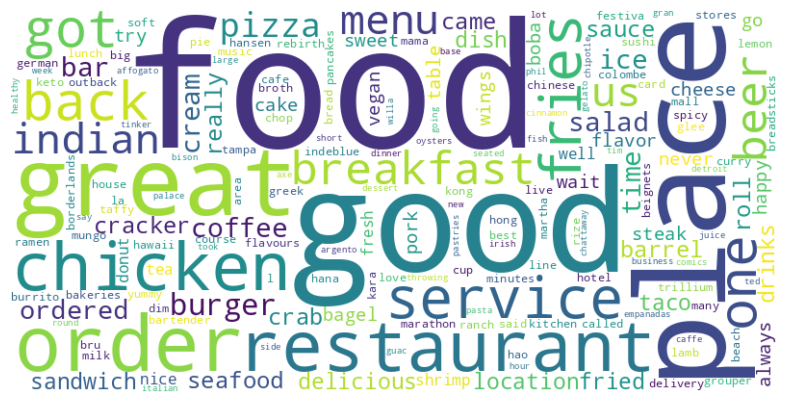

In [43]:
# wordcloud for bag of words
word_col = 'top_bow_words'
words_string = ' '.join([word for words in top_review_sample[word_col] for word in words])
create_wordcloud(words_string)

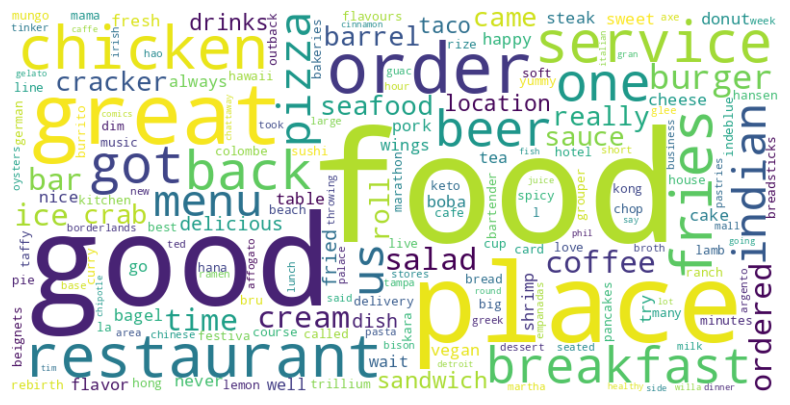

In [44]:
# wordcloud for bag of words
word_col = 'top_tfidf_words'
words_string = ' '.join([word for words in top_review_sample[word_col] for word in words])
create_wordcloud(words_string)